## Network Science Analytics

### Assignement 1

#### I. Graph Theory and Graph Properties

_Question 1_

Let A be the adjacency matrix of an undirected graph (unweighted, with no self-loops) and 1 be the
column vector whose elements are all 1.

(a) 

Let k be the vector whose elementsare the degrees  $k_i$ of the nodes.

$k = A*1$

(b)

Let m be the number of edges in the graph.

$ m = \frac{1}{2} * trace(A^t*A) $

(c)

Let N be the matrix whose element $N_{i,j}$ is equal to the number of common neighbors of nodes $i$
and $j$.

$ N = A^t*A $

_Question 2_

Let h be the number of edges in the graph. All of them connect a node from the group (1) to the group (2).

In the group (1), the mean degree is $  c_1 = \frac{b}{n_1} $

In the group (2), the mean degree is $  c_2 = \frac{b}{n_2} $

Therefore, we say that $ n_1 * c_1 = n_2 * c_2 $ and $ c_2 = \frac{n_1}{n_2} * c_1 $

_Question 3_

(a)

$ A^3 $ counts the number of paths of length 3 between two nodes. We want to count the number $\Delta G$ of triangles in the graph. Each element of the diagonal of $ A^3 $ counts twice the number of triangles the node is involved in. Indeed it counts the paths of length 3 that start and finish with this node.

If we add the diagonal elements of the matrix we also count each triangle three times with each of the nodes of this triangle.

Thus, $ \Delta G = \frac{Trace(A^3)}{6} $

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math

In [2]:

dG = nx.DiGraph()
with open('CA-GrQc.txt', 'r') as file:
    text_file = file.readlines()

for i in range(4,len(text_file)):
    # print(text_file[i])
    nodes = text_file[i].split('\t')
    nodes[1] = nodes[1][:-1]
    
    list_nodes = []
    dG.add_edge(nodes[0], nodes[1])

# nx.draw(dG)
# plt.show()

print('Number of Nodes in the Graph:', len(dG))
print('Number of Edges in the Graph:', dG.number_of_edges())


Number of Nodes in the Graph: 5242
Number of Edges in the Graph: 28980


Number of Connected Components: 355
Distribution of components size: {1: 1, 2: 177, 3: 98, 4: 30, 5: 17, 6: 12, 7: 8, 8: 6, 9: 2, 10: 1, 12: 1, 14: 1, 4158: 1}


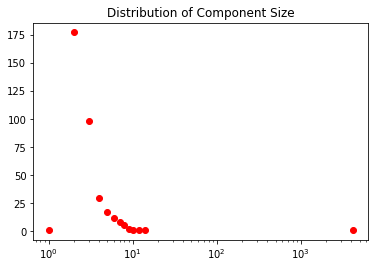

In [3]:
# Creation of the same Graph, but undirected

G = nx.Graph()

for i in range(4,len(text_file)):
    nodes = text_file[i].split('\t')
    nodes[1] = nodes[1][:-1]
    
    list_nodes = []

    G.add_edge(nodes[0], nodes[1])
    
print('Number of Connected Components:', nx.number_connected_components(G))

CC_list = nx.connected_components(G)

sorted_list_components= sorted(CC_list, key=len)

components = {}
for element in sorted_list_components:
    component_size = len(element)
    if component_size in components.keys():
        components[component_size] += 1
    else:
        components[component_size] = 1
        
print('Distribution of components size:', components)

x = list(components.keys())
y = list(components.values())

# print(x)
# print(y)

plt.semilogx(x, y, 'ro')
plt.title('Distribution of Component Size')
plt.show()


In [4]:
Connected_Components_Subgraphs = sorted(nx.connected_component_subgraphs(G), key=len, reverse=True)
# print(len(Connected_Components_Subgraphs))

GCC = Connected_Components_Subgraphs[0]

print('Number of Nodes in the GCC:', len(GCC))
print('Number of Edges in the GCC:', GCC.number_of_edges())

print('Fraction of Nodes in the GCC:', len(GCC)/len(G))
print('Fraction of Edges in the GCC:', GCC.number_of_edges()/G.number_of_edges())

Number of Nodes in the GCC: 4158
Number of Edges in the GCC: 13428
Fraction of Nodes in the GCC: 0.7932086989698588
Fraction of Edges in the GCC: 0.9263245033112583


The GCC represents 80% of the nodes and 92% of the edges of the graph. Most of the graph is contained in this GCC. It means that most of the authors are linked to each other.

In [5]:
degrees = G.degree()
# print(degrees)

degrees = np.array(list(degrees.values()))

degree_max = max(degrees)
degree_min = min(degrees)
degree_avg = np.average(degrees)
degree_median = np.median(degrees)

print('Maximum Degree', degree_max)
print('Minimum Degree', degree_min)
print('Average Degree', degree_avg)
print('Median Degree', degree_median)

Maximum Degree 81
Minimum Degree 1
Average Degree 5.530713468141931
Median Degree 3.0


Some Nodes have high degree, but most of them have a small one (50% of the nodes have a degree of 1, 2 or 3 which is small).

C:\Users\Vincent\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


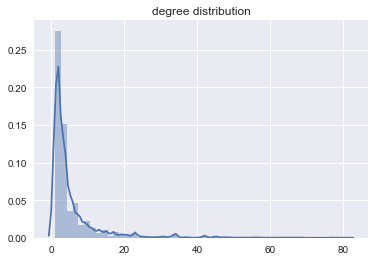

In [6]:
sns.set(color_codes=True)

sns.distplot(degrees)
plt.title('degree distribution')
plt.show()

gamma (0.31386729932571933, 0.9999999999999999, 1.712164498020201)


C:\Users\Vincent\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


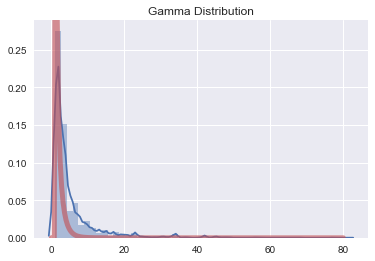

C:\Users\Vincent\Anaconda3\lib\site-packages\scipy\stats\_continuous_distns.py:412: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
C:\Users\Vincent\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:161: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)


beta (0.5858668271813209, 330.3676385062765, 0.9999999999999999, 1448.5508374433332)


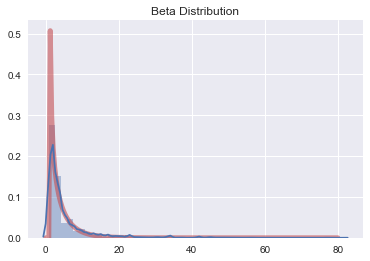

rayleigh (-4.848836115036904, 9.231343763474126)


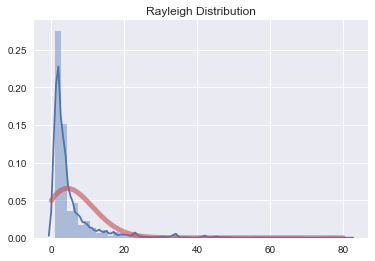

norm (5.530713468141931, 7.918407301678446)


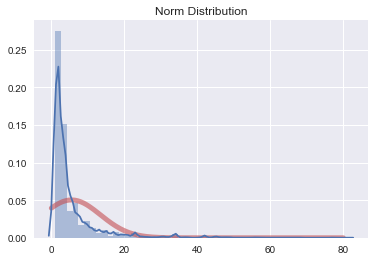

C:\Users\Vincent\Anaconda3\lib\site-packages\scipy\stats\_distn_infrastructure.py:2303: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu


pareto (0.9981359104274129, -0.4078395532384388, 1.407839552290595)


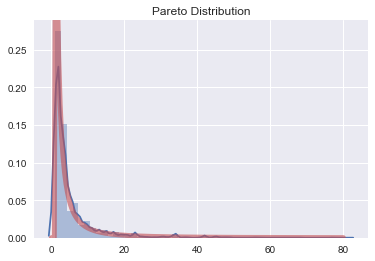

In [7]:
import scipy
import scipy.stats
from scipy.stats import norm, gamma, beta, rayleigh, pareto

y=degrees
dist_names = ['gamma', 'beta', 'rayleigh', 'norm', 'pareto']

for dist_name in dist_names:
    dist = getattr(scipy.stats, dist_name)
    param = dist.fit(y)
    print(dist_name, param)
    
    if dist_name == 'norm':
        x = np.linspace(0, 80, 200)
        plt.plot(x, norm.pdf(x, param[0], param[1]), 'r-', lw=5, alpha=0.6, label='norm pdf')
        sns.distplot(degrees)
        plt.title('Norm Distribution')
        plt.show()
    elif dist_name == 'beta':
        x = np.linspace(0, 80, 200)
        plt.plot(x, beta.pdf(x, param[0], param[1], param[2], param[3]), 'r-', lw=5, alpha=0.6, label='beta pdf')
        sns.distplot(degrees)
        plt.title('Beta Distribution')
        plt.show()
    elif dist_name == 'gamma':
        x = np.linspace(0, 80, 200)
        sns.distplot(degrees)
        plt.plot(x, gamma.pdf(x, param[0], param[1], param[2]), 'r-', lw=5, alpha=0.6, label='beta pdf')   
        plt.title('Gamma Distribution')
        plt.show()
    elif dist_name == 'pareto':
        x = np.linspace(0, 80, 200)
        sns.distplot(degrees)
        plt.plot(x, pareto.pdf(x, param[0], param[1], param[2]), 'r-', lw=5, alpha=0.6, label='beta pdf')
        plt.title('Pareto Distribution')
        plt.show()
    elif dist_name == 'rayleigh':
        x = np.linspace(0, 80, 200)
        sns.distplot(degrees)
        plt.plot(x, rayleigh.pdf(x, param[0], param[1]), 'r-', lw=5, alpha=0.6, label='beta pdf')
        plt.title('Rayleigh Distribution')
        plt.show()


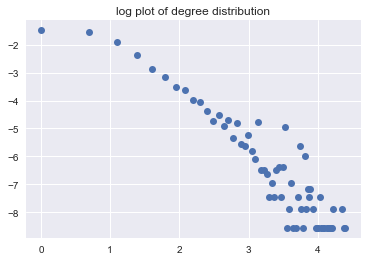

In [8]:
# Let's work with a distibution p(k) ~ ck^-a with p(k) the fraction of nodes with degree k

degrees_dict = {}
for i in range(len(degrees)):
    try:
        degrees_dict[degrees[i]] += 1
    except:
        degrees_dict[degrees[i]] = 1

for key in degrees_dict.keys():
    degrees_dict[key] = degrees_dict[key] / len(degrees)

def log_pk(x):
    global degrees_dict
    return math.log(degrees_dict[x])

x_axis = sorted(list(degrees_dict.keys()))
x_axis_log = []
y_axis_log = []
y_axis_normal = []
for element in x_axis:
    x_axis_log += [math.log(element)]
    y_axis_log += [math.log(degrees_dict[element])]
    y_axis_normal += [degrees_dict[element]]

plt.plot(x_axis_log, y_axis_log, 'o')
plt.title('log plot of degree distribution')
plt.show()

[-2.04177773  0.23193436]


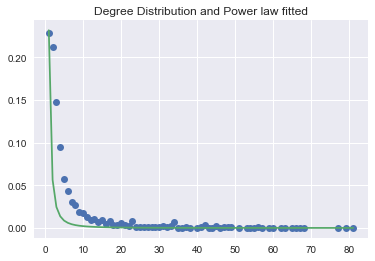

In [9]:
p = np.polyfit(x_axis_log, y_axis_log, deg=1)
print(p)

def pk(x):
    return p[1] * (x**(p[0]))

y_axis = []
for element in x_axis:
    y_axis += [pk(element)]

plt.plot(x_axis, y_axis_normal, 'o')
plt.plot(x_axis, y_axis)
plt.title('Degree Distribution and Power law fitted')
plt.show()

In [10]:
triangles_dict = nx.triangles(GCC)

number_triangles = sum(list(triangles_dict.values()))/3

print('Number of triangles in the GCC:', number_triangles)
print(len(GCC))

Number of triangles in the GCC: 47779.0
4158


C:\Users\Vincent\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


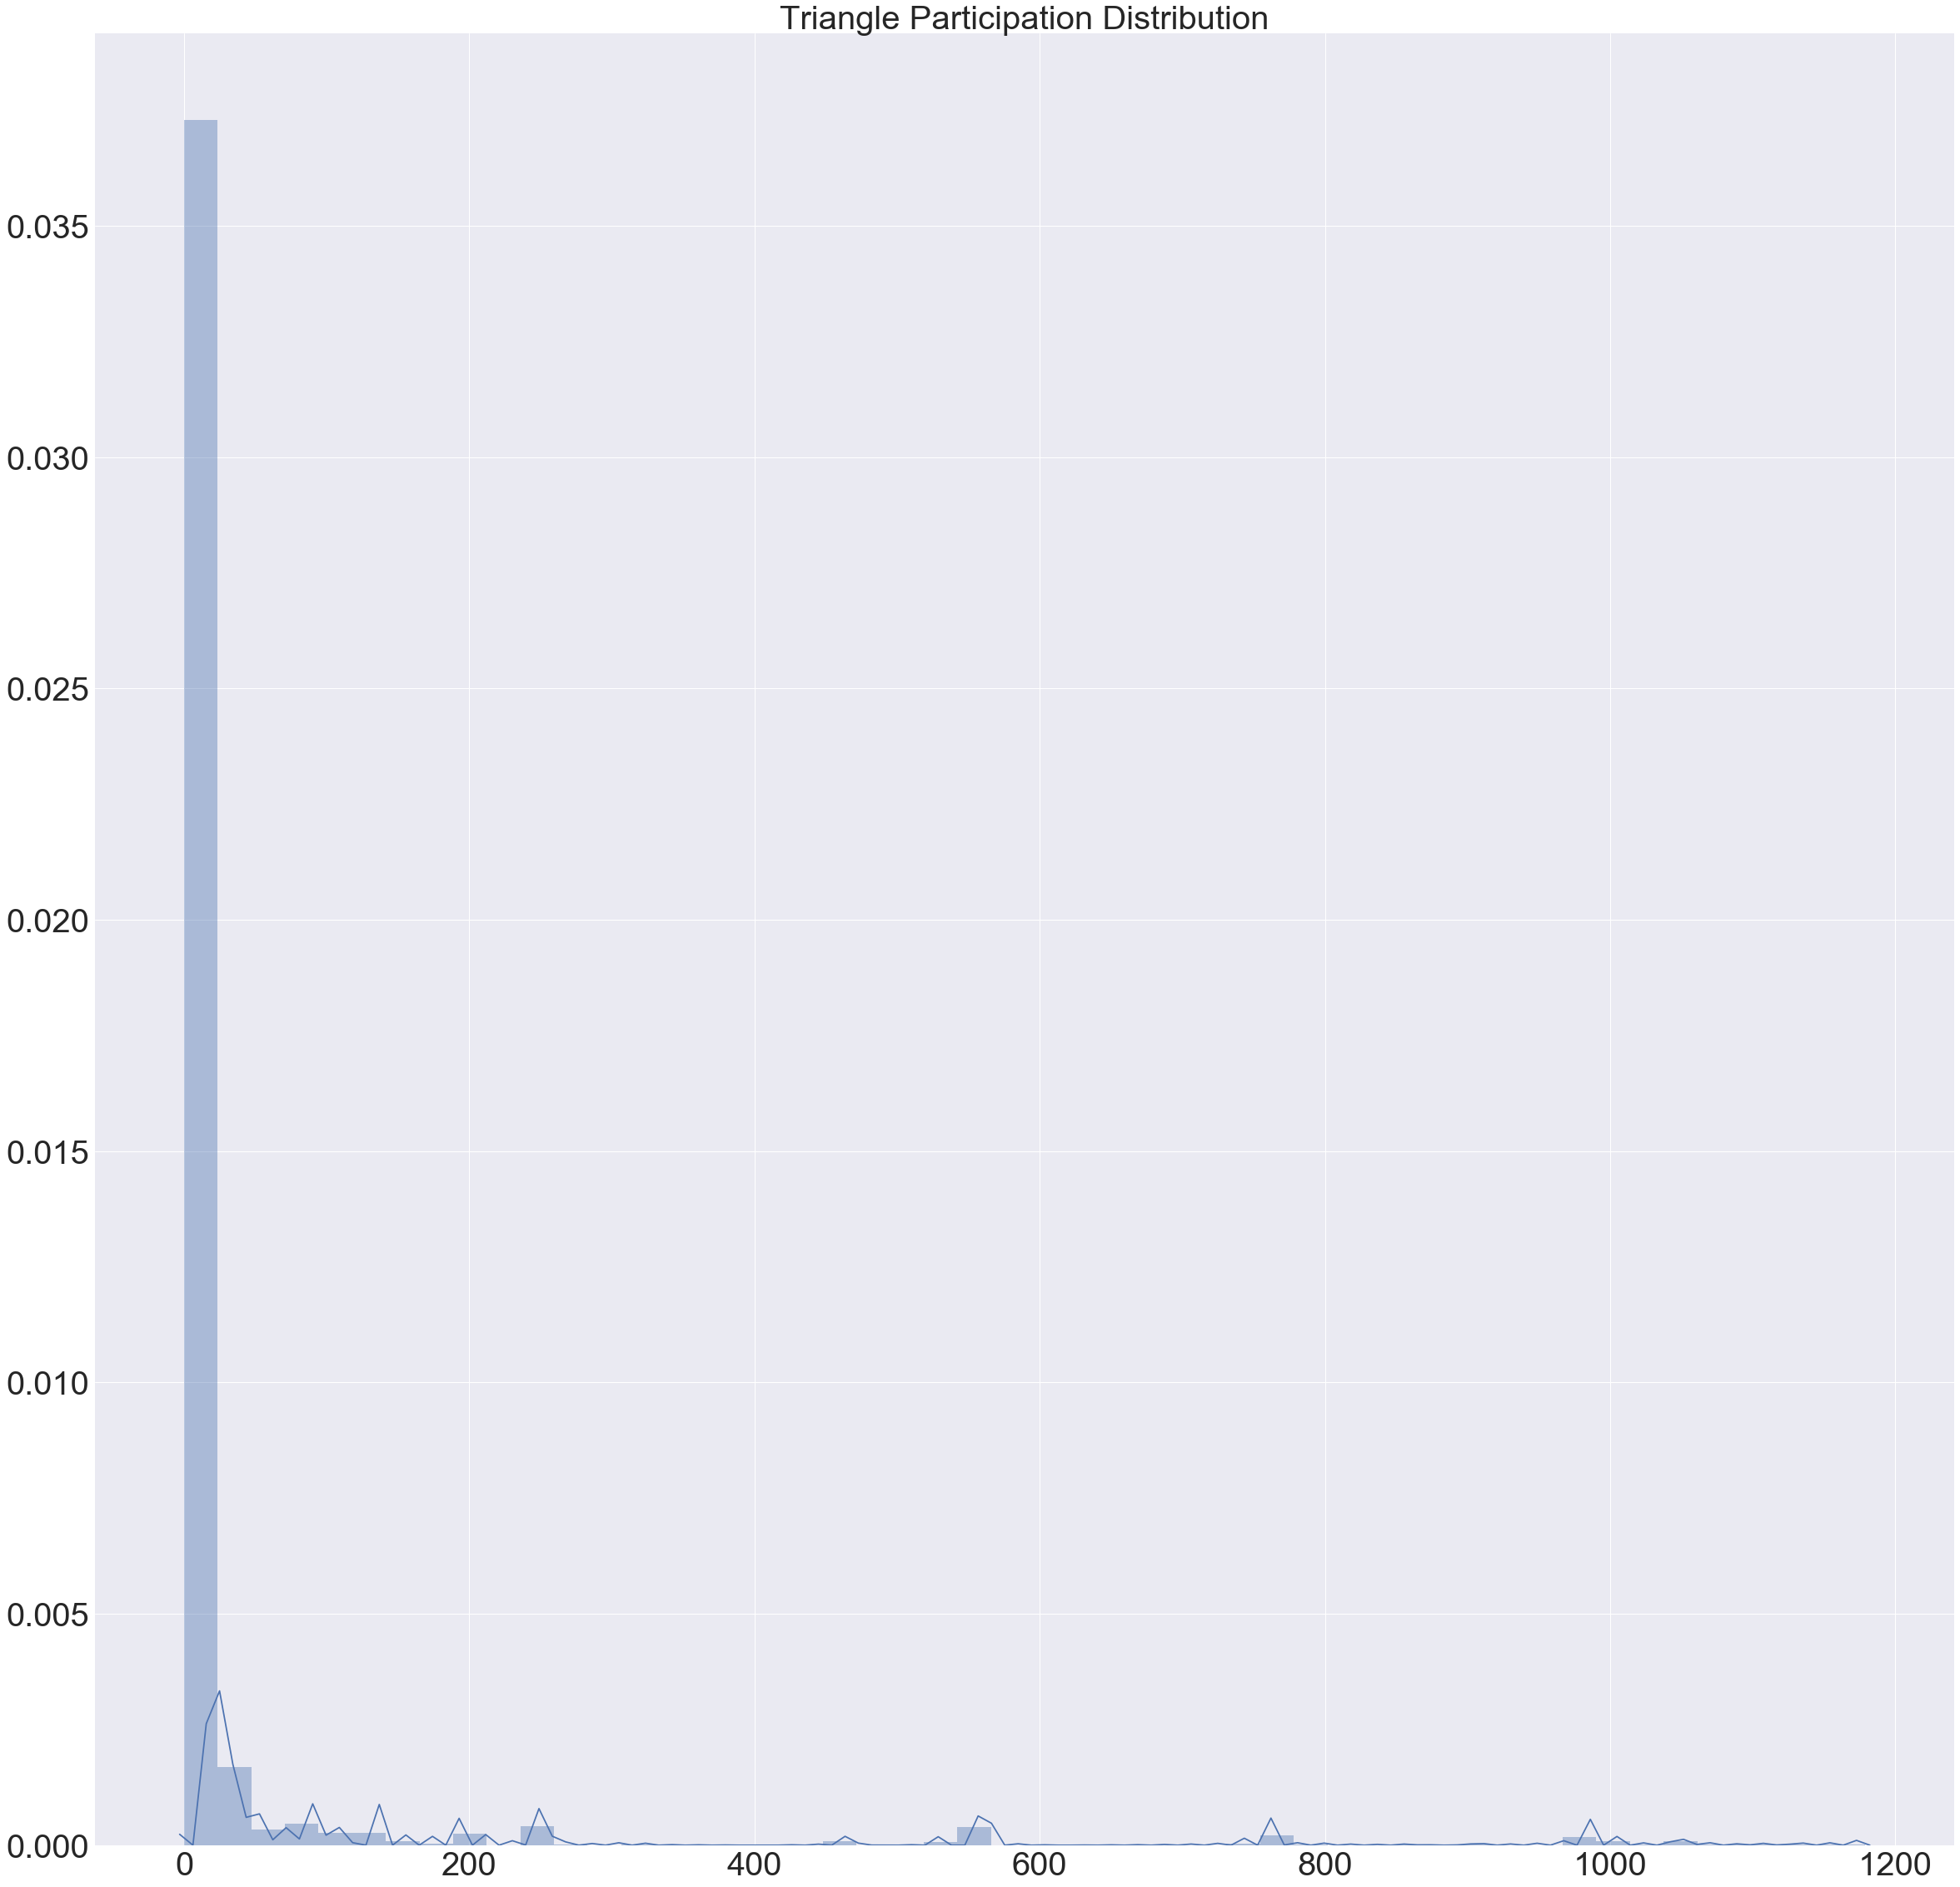

In [11]:
triangle_participation_distribution = np.array(list(triangles_dict.values()))

plt.figure(figsize=(40, 40))
plt.tick_params(axis='both', which='major', labelsize=40)
plt.title('Triangle Participation Distribution', fontsize=40)
sns.distplot(triangle_participation_distribution)
plt.show()

In [12]:
# triangle_participation_distribution = np.array(list(triangles_dict.values()))
# triangle_participation_distribution_log = []

# for element in triangle_participation_distribution:
#     print(element)
#     triangle_participation_distribution_log += [math.log(element)]

# plt.figure(figsize=(20, 20))
# plt.tick_params(axis='both', which='major', labelsize=20)
# plt.title('Triangle Participation Distribution', fontsize=20)
# sns.distplot(triangle_participation_distribution_log)
# plt.show()

In [13]:
A = nx.adjacency_matrix(GCC)
A = nx.to_numpy_matrix(GCC)
print(A)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [14]:
eig_val = np.linalg.eigvals(A)

In [15]:
delta_G = 0

for i in range(len(eig_val)):
    delta_G += (eig_val[i]**3).real

delta_G = delta_G/6
print(delta_G)
print(number_triangles)

47808.50000000058
47779.0


In [16]:
errors = []
percentages = []
eig_val = sorted(eig_val, reverse=True)
print(eig_val[-1])
for i in range(50):
    percentage = 2*i
    delta_G = 0
    for i in range(int(len(eig_val)*percentage/100)):
        delta_G += (eig_val[i]**3).real
    delta_G = delta_G/6
    
    percentages += [percentage]
    errors += [abs(delta_G - number_triangles)/number_triangles]
    

(-7.307670033393051+0j)


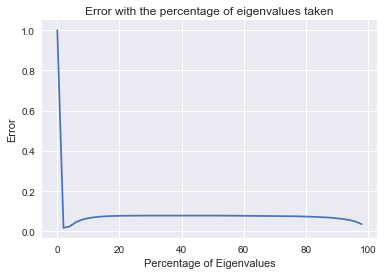

In [17]:
plt.plot(percentages, errors)
plt.title('Error with the percentage of eigenvalues taken')
plt.xlabel('Percentage of Eigenvalues')
plt.ylabel('Error')
plt.show()

In [18]:
error = abs(delta_G - number_triangles)/number_triangles

print('Error:', error)

Error: 0.03622173209935697


#### Question 8


Generation of an Erdös-Rényi random graph $G_{n, p}$

In [19]:
n = 10
p = 0.9
G_n_p = nx.fast_gnp_random_graph(n, p)

C:\Users\Vincent\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Vincent\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\Vincent\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\Vincent\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be re

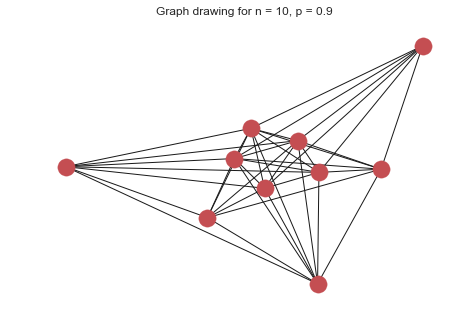

In [20]:
nx.draw(G_n_p)
plt.title('Graph drawing for n = 10, p = 0.9')
plt.show()

In [21]:
n = 1000
p = 0.009
G_n_p = nx.fast_gnp_random_graph(n, p)

G_n_p_degrees = G_n_p.degree()
G_n_p_degrees = np.array(list(G_n_p_degrees.values()))
G_n_p_degree_avg = np.average(G_n_p_degrees)

print('Average Degree of the Gnp network:', G_n_p_degree_avg)

Average Degree of the Gnp network: 9.064


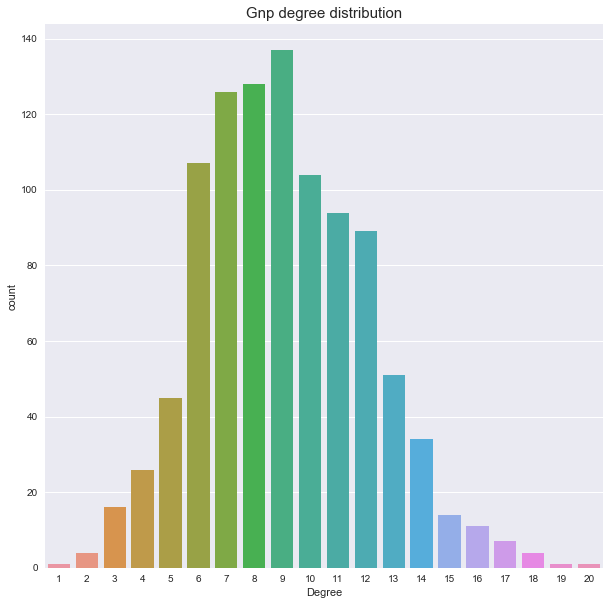

In [22]:
sns.set(color_codes=True)

plt.figure(figsize=(10, 10))
sns.countplot(G_n_p_degrees)
plt.title('Gnp degree distribution', fontsize=15)
plt.xlabel('Degree')
plt.show()

In [23]:
print(nx.is_connected(G_n_p))

True


#### Question 9

In [24]:
A1 = np.array([[0.99, 0.26], [0.26, 0.53]])
A2 = np.kron(A1, A1)
print(A2)
A3 = np.kron(A2, A1)
print(A3)
A4 = np.kron(A3, A1)
print(A4.shape)

[[0.9801 0.2574 0.2574 0.0676]
 [0.2574 0.5247 0.0676 0.1378]
 [0.2574 0.0676 0.5247 0.1378]
 [0.0676 0.1378 0.1378 0.2809]]
[[0.970299 0.254826 0.254826 0.066924 0.254826 0.066924 0.066924 0.017576]
 [0.254826 0.519453 0.066924 0.136422 0.066924 0.136422 0.017576 0.035828]
 [0.254826 0.066924 0.519453 0.136422 0.066924 0.017576 0.136422 0.035828]
 [0.066924 0.136422 0.136422 0.278091 0.017576 0.035828 0.035828 0.073034]
 [0.254826 0.066924 0.066924 0.017576 0.519453 0.136422 0.136422 0.035828]
 [0.066924 0.136422 0.017576 0.035828 0.136422 0.278091 0.035828 0.073034]
 [0.066924 0.017576 0.136422 0.035828 0.136422 0.035828 0.278091 0.073034]
 [0.017576 0.035828 0.035828 0.073034 0.035828 0.073034 0.073034 0.148877]]
(16, 16)


In [25]:
An = A1

for i in range(11):
    An = np.kron(An, A1)
print(An)

[[8.86384872e-01 2.32787946e-01 2.32787946e-01 ... 3.63364104e-07
  3.63364104e-07 9.54289567e-08]
 [2.32787946e-01 4.74529275e-01 6.11362283e-02 ... 7.40703751e-07
  9.54289567e-08 1.94528258e-07]
 [2.32787946e-01 6.11362283e-02 4.74529275e-01 ... 9.54289567e-08
  7.40703751e-07 1.94528258e-07]
 ...
 [3.63364104e-07 7.40703751e-07 9.54289567e-08 ... 9.17634557e-04
  1.18223930e-04 2.40994934e-04]
 [3.63364104e-07 9.54289567e-08 7.40703751e-07 ... 1.18223930e-04
  9.17634557e-04 2.40994934e-04]
 [9.54289567e-08 1.94528258e-07 1.94528258e-07 ... 2.40994934e-04
  2.40994934e-04 4.91258904e-04]]


Average Degree of the K network: 2.2035002035002034


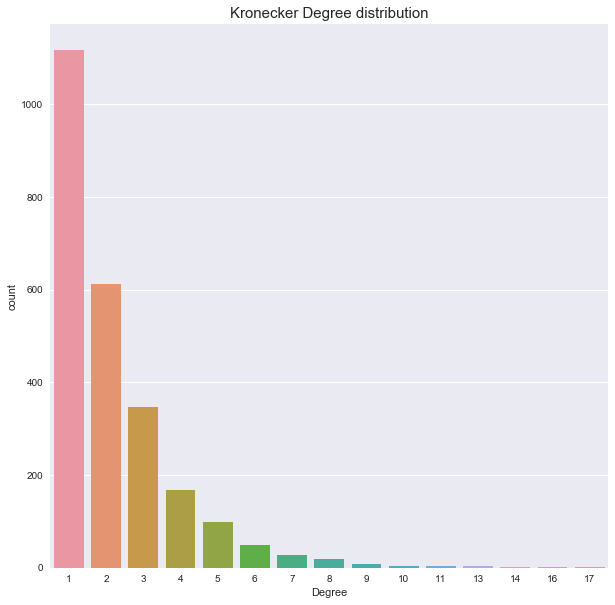

In [36]:
#K = nx.from_numpy_matrix(An)
import random

K = nx.Graph()

for i in range(len(An)):
    for j in range(i, len(An)):
        rn = random.uniform(0, 1)
        if rn <= An[i][j]:
            K.add_edge(i, j)

K_degrees = K.degree()
K_degrees = np.array(list(K_degrees.values()))
K_degree_avg = np.average(K_degrees)

print('Average Degree of the K network:', K_degree_avg)

sns.set(color_codes=True)

plt.figure(figsize=(10, 10))
sns.countplot(K_degrees)
plt.title('Kronecker Degree distribution', fontsize=15)
plt.xlabel('Degree')
plt.show()

In [37]:
Connected_Components_Subgraphs = sorted(nx.connected_component_subgraphs(K), key=len, reverse=True)
# print(len(Connected_Components_Subgraphs))

GCC = Connected_Components_Subgraphs[0]

print('Number of Nodes in the GCC:', len(GCC))
print('Number of Edges in the GCC:', GCC.number_of_edges())

print('Fraction of Nodes in the GCC:', len(GCC)/len(G))
print('Fraction of Edges in the GCC:', GCC.number_of_edges()/G.number_of_edges())

Number of Nodes in the GCC: 1785
Number of Edges in the GCC: 2268
Fraction of Nodes in the GCC: 0.34051888592140406
Fraction of Edges in the GCC: 0.1564569536423841


Distribution of components size: {1: 24, 2: 167, 3: 50, 4: 21, 5: 8, 6: 4, 8: 2, 1785: 1}


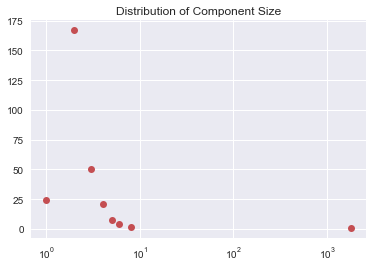

In [39]:
CC_list = nx.connected_components(K)

sorted_list_components= sorted(CC_list, key=len)

components = {}
for element in sorted_list_components:
    component_size = len(element)
    if component_size in components.keys():
        components[component_size] += 1
    else:
        components[component_size] = 1
        
print('Distribution of components size:', components)

x = list(components.keys())
y = list(components.values())

# print(x)
# print(y)

plt.semilogx(x, y, 'ro')
plt.title('Distribution of Component Size')
plt.show()


#### Question 10

In [26]:
G_del = nx.Graph()

for i in range(4,len(text_file)):
    nodes = text_file[i].split('\t')
    nodes[1] = nodes[1][:-1]
    
    list_nodes = []

    G_del.add_edge(nodes[0], nodes[1])
    
Connected_Components_Subgraphs = sorted(nx.connected_component_subgraphs(G_del), key=len, reverse=True)
G_del = Connected_Components_Subgraphs[0]

total_number_nodes = len(G_del)
Connected_Components_Subgraphs = sorted(nx.connected_component_subgraphs(G_del), key=len, reverse=True)

GCC = Connected_Components_Subgraphs[0]
print(len(GCC))

size_GCC = [len(GCC)]
size_rest_components = [total_number_nodes-len(GCC)]
fraction_deleted_node = [0]


# for i in range(1, total_number_nodes+1):
for i in range(1, 833):
    if i%100 == 0:
        print(i)
    nodes_number = len(list(G_del))
    try:
        
        node_to_del = np.random.randint(1, nodes_number)
        G_del.remove_node(list(G_del)[node_to_del])

        Connected_Components_Subgraphs = sorted(nx.connected_component_subgraphs(G_del), key=len, reverse=True)
        GCC = Connected_Components_Subgraphs[0]
        size_GCC += [len(GCC)]
        size_rest_components += [nodes_number -1 - len(GCC)]
        fraction_deleted_node += [i/total_number_nodes]
    except:
        pass
    
#print(size_GCC)

4158
100
200
300
400
500
600
700
800


In [33]:
plt.plot(fraction_deleted_node, size_GCC, color='blue', label='GCC Size')
plt.plot(fraction_deleted_node, size_rest_components, color='green', label='RoC Size')
plt.title('Size of GCC and Rest of Components vs Fraction of Deleted Node - Random Deletion')
plt.xlabel('Fraction of Deleted Node')
plt.ylabel('Size')
plt.legend(loc='upper right', shadow=True)
# plt.show()

In [28]:
G_del = nx.Graph()

for i in range(4,len(text_file)):
    nodes = text_file[i].split('\t')
    nodes[1] = nodes[1][:-1]
    
    list_nodes = []

    G_del.add_edge(nodes[0], nodes[1])
    
Connected_Components_Subgraphs = sorted(nx.connected_component_subgraphs(G_del), key=len, reverse=True)
G_del = Connected_Components_Subgraphs[0]

total_number_nodes = len(G_del)
Connected_Components_Subgraphs = sorted(nx.connected_component_subgraphs(G_del), key=len, reverse=True)

GCC = Connected_Components_Subgraphs[0]
print(len(GCC))
print(len(G_del))

size_GCC_top = [len(GCC)]
size_rest_components_top = [total_number_nodes-len(GCC)]
fraction_deleted_node_top = [0]

# for i in range(1, total_number_nodes+1):
for i in range(1, 833):
    try:
        nodes_number = len(list(G_del))
        G_degrees = G_del.degree()
        node_degrees, nodes = zip(*sorted(zip(list(G_degrees.values()), list(G_degrees.keys()))))
        nodes_to_del = nodes[len(nodes)-min(10, len(nodes)):len(nodes)]
        indice_to_del = np.random.randint(1, min(len(nodes), 10))
        node_to_del = nodes_to_del[indice_to_del]

        G_del.remove_node(node_to_del)
        Connected_Components_Subgraphs = sorted(nx.connected_component_subgraphs(G_del), key=len, reverse=True)
        GCC = Connected_Components_Subgraphs[0]
        size_GCC_top += [len(GCC)]
        size_rest_components_top += [nodes_number -1 - len(GCC)]
        fraction_deleted_node_top += [i/total_number_nodes]
    except:
        pass


4158
4158


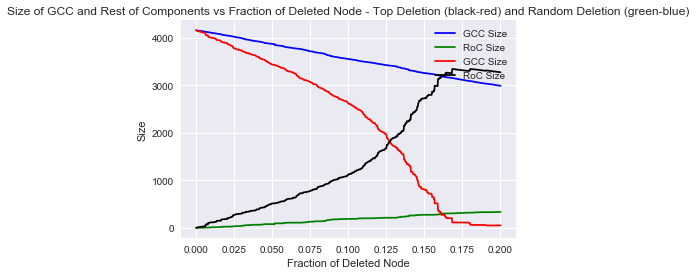

In [34]:
plt.plot(fraction_deleted_node_top, size_GCC_top, color='red', label='GCC Size')
plt.plot(fraction_deleted_node_top, size_rest_components_top, color='black', label='RoC Size')
plt.title('Size of GCC and Rest of Components vs Fraction of Deleted Node - Top Deletion (black-red) and Random Deletion (green-blue)')
plt.xlabel('Fraction of Deleted Node')
plt.ylabel('Size')
plt.legend(loc='upper right', shadow=True)
plt.show()